<a href="https://colab.research.google.com/github/Mechanics-Mechatronics-and-Robotics/Fuzzy-logic-and-ML/blob/main/Blood_flow_animatioin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Установка и загрузка библиотек

Fastai

In [106]:
!pip install -Uqq fastbook
!pip install imageio
import fastbook
fastbook.setup_book()

In [107]:
from fastai.vision.all import*
import cv2
from google.colab.patches import cv2_imshow
import imageio

#Исходные данные

##Настройки

Визуализация

In [108]:
fig_size = (5,5)
img_map = 'Blues'#'gray','Blues'
# img slice
leftx,lefty = 200, 500
h,w = 224, 224
scf = 1 #scale factor

Путь

In [109]:
path = Path('/content/gdrive/MyDrive/work/Fuzzy_logic_and_ML/Blood_count_Toy_dataset/lmg_f_16.02.2022_2p5_gc')
path

Path('/content/gdrive/MyDrive/work/Fuzzy_logic_and_ML/Blood_count_Toy_dataset/lmg_f_16.02.2022_2p5_gc')

Чтение содержимого папки

In [110]:
#?get_image_files

In [111]:
fnames = sorted(get_image_files(path))
#fnames

In [112]:
len(fnames), type(fnames)

(100, list)

#Вывод изображений на экран

С помощью библиотеки PIL (Python image library)

In [113]:
img = Image.open(fnames[0])
#img

С помощью numpy (np), opencv (cv2) и matplotlib (plt)

In [114]:
img1 = np.uint8(cv2.imread(str(fnames[0])))
img1.shape, type(img1)

((1000, 1000, 3), numpy.ndarray)

Text(0.5, 1.0, 'Red filter')

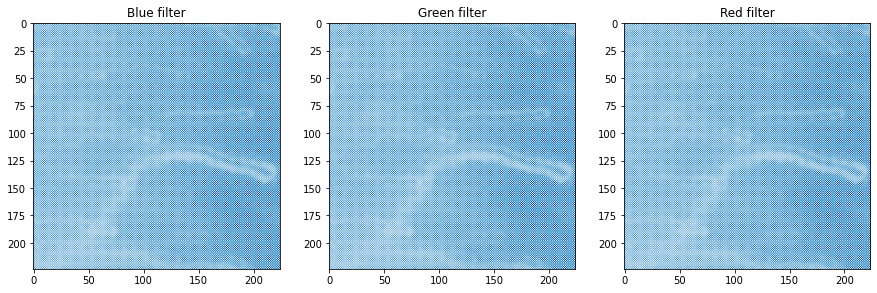

In [115]:
plt.figure(figsize = (fig_size[0]*3,fig_size[1]))

plt.subplot(1,3,1)
plt.imshow(img1[leftx:(leftx+w),lefty:(lefty+h),0], cmap = img_map)
plt.title('Blue filter')

plt.subplot(1,3,2)
plt.imshow(img1[leftx:(leftx+w),lefty:(lefty+h),1], cmap = img_map)
plt.title('Green filter')

plt.subplot(1,3,3)
plt.imshow(img1[leftx:(leftx+w),lefty:(lefty+h),2], cmap = img_map)
plt.title('Red filter')

#Анимация

In [116]:
  #for o in fnames:
    #print(o)

In [117]:
#for o in range(len(fnames)):
  #print(fnames[o])

Способ 1

In [118]:
img = np.uint32(cv2.imread(str(fnames[0])))

In [119]:
img.max()

239

In [120]:
with imageio.get_writer("blood_flow.gif", mode="I") as writer:
  for o in fnames:
    img = np.uint8(cv2.imread(str(o)))
    img_slice = img[leftx:(leftx+w),lefty:(lefty+h),2]
    img_slice_resized = cv2.resize(img_slice, (w*scf,h*scf), 
                                   interpolation = cv2.INTER_CUBIC)
    writer.append_data(img_slice_resized)
    #print(o)

Способ 2. Не работает

In [121]:
# frames = []
# for o in fnames:
#   img = Image.open(o)
#   frames.append(img)


In [122]:
# frames[0].save(
#     'blood_flow2.gif',
#     save_all=True,
#     append_images=frames[1:],  # Срез который игнорирует первый кадр.
#     optimize=True,
#     duration=100,
#     loop=0)